# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/syedahasan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")
type(api_key)

str

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='bitcoin', language="en")
bitcoin_news.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [12]:
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

Total articles about Bitcoin: 9561


In [13]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="Ethereum" , language="en")
eth_news.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [15]:
print(f"Total articles about Ethereum: {eth_news['totalResults']}")

Total articles about Ethereum: 2400


In [16]:
# Create the Bitcoin sentiment scores DataFrame
# classnote 12.2
btc_sentiments = []
for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        # append each element of each iteration to the btc_sentiments empty list
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()
        

,date,text,compound,positive,negative,neutral
0,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.000,0.718
1,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.000,0.957
2,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831
3,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
4,2021-06-09,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.000,0.940


In [17]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []
for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        # append each element of each iteration to the eth_sentiments empty list
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000
1,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939
2,2021-06-10,This article was translated from our Spanish e...,-0.3400,0.000,0.066,0.934
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
4,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806


In [18]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.136730,0.076250,0.036750,0.88695
std,0.409336,0.070288,0.054092,0.08129
min,-0.612400,0.000000,0.000000,0.70500
25%,-0.050575,0.032250,0.000000,0.84025
50%,0.128000,0.065500,0.000000,0.90500
75%,0.369700,0.107250,0.064750,0.94375
max,0.840200,0.282000,0.184000,1.00000


In [19]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.063475,0.040500,0.025150,0.934350
std,0.356132,0.058708,0.032347,0.053135
min,-0.381800,0.000000,0.000000,0.806000
25%,-0.273200,0.000000,0.000000,0.920000
50%,0.000000,0.000000,0.000000,0.936500
75%,0.361200,0.074750,0.060250,0.961000
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score 0.076250

Q: Which coin had the highest compound score?

A: Bitcoin has the highest coumpund score 0.840200

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score 0.282000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, We use NLTK and Python to tokenize the text for each coin. Make sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [49]:
# Instantiate the lemmatizer
# class note 12.1
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {"."}

In [50]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
   
    return tokens

In [51]:
# Create a new tokens column for Bitcoin
#tokenizer(btc_df['text'][0])

btc_tokens = []
for text in btc_df['text']:
    tokens = tokenizer(text)
    btc_tokens.append(tokens)
btc_df['tokens'] = btc_tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.000,0.718,"[el, salvadors, president, nayib, bukele, ha, ..."
1,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.000,0.957,"[el, salvador, ha, become, first, country, wor..."
2,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831,"[clean, energy, seemselon, musk, tesla, caused..."
3,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
4,2021-06-09,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.000,0.940,"[image, captionthe, move, mean, bitcoin, accep..."


In [52]:
# Create a new tokens column for Ethereum
#tokenizer(eth_df['text'][0])

eth_tokens = []
for text in eth_df['text']:
    tokens = tokenizer(text)
    eth_tokens.append(tokens)
eth_df['tokens'] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
2,2021-06-10,This article was translated from our Spanish e...,-0.3400,0.000,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806,"[ether, holder, staked, billion, worth, crypto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [53]:
from collections import Counter
from nltk import ngrams

In [59]:
# Generate the Bitcoin N-grams where N=2
btc_ngram_counts = []
for tokens in btc_df['tokens']:
    ngrams_count = dict(Counter(ngrams(tokens, n=2)))
    btc_ngram_counts.append(ngrams_count.items())
btc_ngram_counts

[dict_items([(('el', 'salvadors'), 1), (('salvadors', 'president'), 1), (('president', 'nayib'), 1), (('nayib', 'bukele'), 1), (('bukele', 'ha'), 1), (('ha', 'made'), 1), (('made', 'good'), 1), (('good', 'promise'), 1), (('promise', 'adopt'), 1), (('adopt', 'bitcoin'), 1), (('bitcoin', 'legal'), 1), (('legal', 'tender'), 1), (('tender', 'officials'), 1), (('officials', 'central'), 1), (('central', 'american'), 1), (('american', 'country'), 1), (('country', 'congress'), 1), (('congress', 'voted'), 1), (('voted', 'accept'), 1), (('accept', 'cryptocurrency'), 1), (('cryptocurrency', 'majori'), 1), (('majori', 'char'), 1)]),
 dict_items([(('el', 'salvador'), 1), (('salvador', 'ha'), 1), (('ha', 'become'), 1), (('become', 'first'), 1), (('first', 'country'), 1), (('country', 'world'), 1), (('world', 'recognize'), 1), (('recognize', 'cryptocurrency'), 1), (('cryptocurrency', 'bitcoin'), 1), (('bitcoin', 'legal'), 1), (('legal', 'currency'), 1), (('currency', 'according'), 1), (('according', 

In [60]:
# Generate the Ethereum N-grams where N=2
eth_ngram_counts = []
for tokens in eth_df['tokens']:
    ngrams_count = dict(Counter(ngrams(tokens, n=2)))
    eth_ngram_counts.append(ngrams_count.items())
eth_ngram_counts 

[dict_items([(('tldr', 'cryptocurrency'), 1), (('cryptocurrency', 'ethereum'), 1), (('ethereum', 'solidity'), 1), (('solidity', 'blockchain'), 1), (('blockchain', 'developer'), 1), (('developer', 'bundle'), 1), (('bundle', 'sale'), 1), (('sale', 'june'), 1), (('june', 'saving'), 1), (('saving', 'list'), 1), (('list', 'priceis'), 1), (('priceis', 'everyone'), 1), (('everyone', 'know'), 1), (('know', 'investing'), 1), (('investing', 'cryptocurrency'), 1), (('cryptocurrency', 'char'), 1)]),
 dict_items([(('wasnt', 'long'), 1), (('long', 'ago'), 1), (('ago', 'average'), 1), (('average', 'person'), 1), (('person', 'clue'), 1), (('clue', 'nft'), 1), (('nft', 'wa'), 1), (('wa', 'nowadays'), 1), (('nowadays', 'theyre'), 1), (('theyre', 'making'), 1), (('making', 'headline'), 1), (('headline', 'selling'), 1), (('selling', 'hundred'), 1), (('hundred', 'thousand'), 1), (('thousand', 'buck'), 1), (('buck', 'predictably'), 1), (('predictably', 'folk'), 1), (('folk', 'learning'), 1), (('learning', '

In [56]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [61]:
# Use token_count to get the top 10 words for Bitcoin
btc_wordmap = {}
for btc_token in btc_df['tokens']:
    top = dict(token_count(btc_token, 10))
    for key in top:
        if(key in btc_wordmap):
            btc_wordmap[key] += top[key]
        else:
            btc_wordmap[key] = top[key]
btc_word_list = list(btc_wordmap.items())
x = sorted(btc_word_list, key=lambda x:x[1], reverse=True)
btc_top_10 = []

for i in range(0,10):
    btc_top_10.append(x[i])
btc_top_10 

[('bitcoin', 13),
 ('salvador', 7),
 ('el', 6),
 ('reuters', 6),
 ('ha', 4),
 ('cryptocurrency', 4),
 ('us', 4),
 ('world', 3),
 ('attack', 3),
 ('week', 3)]

In [62]:
# Use token_count to get the top 10 words for Ethereum
eth_wordmap = {}
for eth_token in eth_df['tokens']:
    top = dict(token_count(eth_token, 10))
    for key in top:
        if(key in eth_wordmap):
            eth_wordmap[key] += top[key]
        else:
            eth_wordmap[key] = top[key]
eth_word_list = list(eth_wordmap.items())
y = sorted(eth_word_list, key=lambda x:x[1], reverse=True)
eth_top_10 = []

for i in range(0,10):
    eth_top_10.append(y[i])
eth_top_10

[('bitcoin', 9),
 ('world', 8),
 ('cryptocurrency', 7),
 ('previous', 7),
 ('closebitcoin', 7),
 ('ethereum', 6),
 ('network', 6),
 ('gmt', 6),
 ('reuters', 6),
 ('adding', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

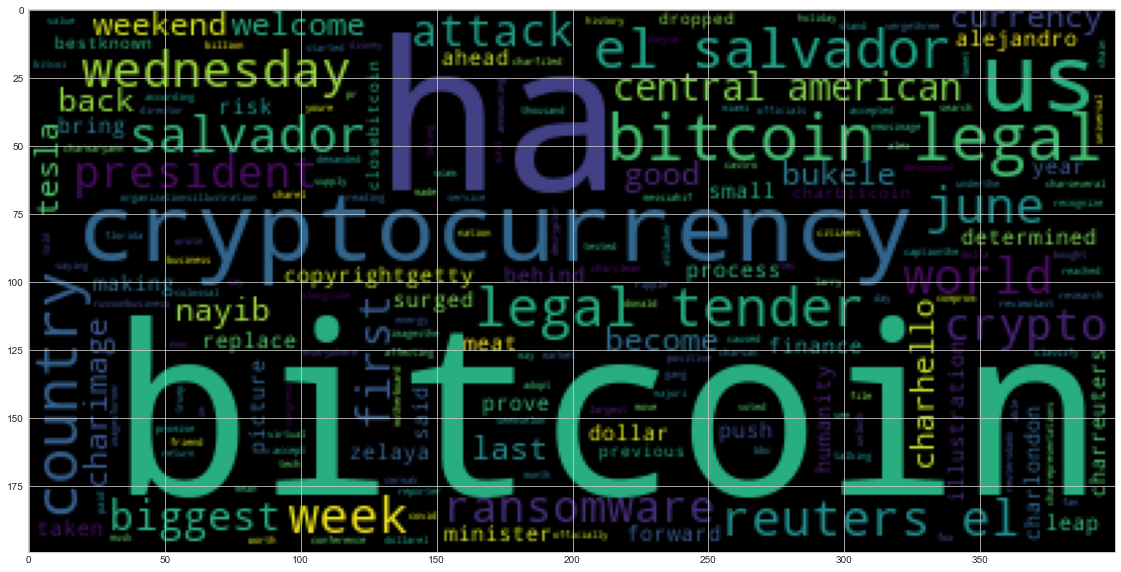

In [64]:
# Generate the Bitcoin word cloud
text_list = []
for btc_tokens in btc_df['tokens']:
    text_list.append(" ".join(btc_tokens))
text = ""
for i in text_list:
    text += i
wc = WordCloud().generate(text)
plt.imshow(wc)

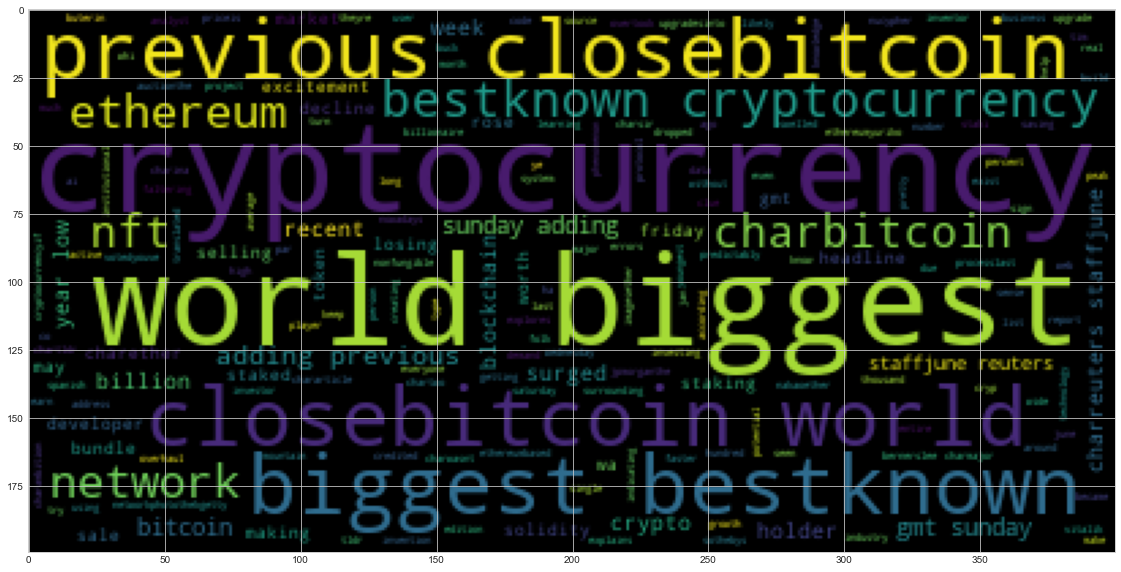

In [65]:
# Generate the Ethereum word cloud
text_list = []
for eth_tokens in eth_df['tokens']:
    text_list.append(" ".join(eth_tokens))
text = ""
for i in text_list:
    text += i
wc = WordCloud().generate(text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [73]:
import spacy
from spacy import displacy

In [74]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [75]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [76]:
# Concatenate all of the Bitcoin text together
btc_text = ""
for text in btc_df['text']:
    btc_text += text
btc_text

'El Salvador\'s President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country\'s congress voted to accept the cryptocurrency by a majori… [+1414 chars]El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars]It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]image captionThe move means bitcoin will be accepted everywhere for goods and services, alongside the US dollar\r\nEl Salvador ha

In [77]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin text analysis"

In [78]:
# Render the visualization
displacy.render(doc, style='ent')

In [79]:
# List all Entities
doc.ents

(El Salvador's,
 Nayib Bukele,
 Bitcoin,
 Central American,
 congress,
 first,
 Nayib Bukele,
 Wednesday,
 Citizens,
 Tesla,
 the past few months,
 first,
 Tesla,
 $1.5 billion,
 thousand,
 Alex Castro,
 The Verge,
 Three days,
 the holiday weekend,
 bitcoin,
 US,
 El Salvador,
 first,
 Bitcoin,
 Miami,
 Florida,
 last weekend,
 covid-19,
 Larry Cermak,
 Review,
 Last week,
 Disney,
 This week,
 Mary-Ann RussonBusiness,
 BBC News,
 US,
 Donald Trump,
 Fox Business,
 Bitcoin,
 US,
 $70m,
 £50.5m,
 Bitcoin,
 June 16,
 Reuters,
 El Salvador,
 U.S.,
 Alejandro Zelaya,
 Wednesday,
 Central American,
 June 23,
 Reuters,
 El Salvador,
 June 23,
 Reuters,
 El Salvador,
 Bitcoin,
 May 20, 2021,
 REUTERS/,
 Reuters,
 Reuters,
 El Salvador,
 U.S.,
 Alejandro Zelaya,
 Wednesday,
 the Central American,
 Colonial Pipeline,
 JBS,
 up to one quarter,
 US,
 Late last week,
 TechCrunchs,
 Equity Monday,
 our morning,
 MarketBeatWhen,
 earlier this year,
 Dogecoin,
 8.54 %,
 36,265,
 Wednesday,
 2,853.31

---

### Ethereum NER

In [81]:
# Concatenate all of the Ethereum text together
eth_text = ""
for text in eth_df['text']:
    eth_text += text
eth_text

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars]It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars]This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars]Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds aroun

In [82]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum text analysis"

In [83]:
# Render the visualization
displacy.render(doc, style='ent')

In [84]:
# List all Entities
doc.ents

(21.25,
 June 17,
 97%,
 NFT,
 hundreds of thousands,
 Spanish,
 AI,
 Last May,
 VitaliK Buterin,
 Yuriko Nakao,
 Friday,
 more than $13 billion,
 Photothek,
 more than $13 billion,
 $40 billion,
 2025,
 JPMorgan,
 Tim Berners-Lee,
 the World Wide Web,
 NFT,
 Sotheby's,
 NFT,
 Last week,
 token,
 NFT,
 90 percent,
 recent weeks,
 recent months,
 8.54 %,
 36,265,
 Wednesday,
 2,853.31,
 Bitcoin,
 30.8%,
 year,
 27,734,
 5.71%,
 35,210,
 Saturday,
 2,131.11,
 Bitcoin,
 45.7%,
 2021,
 6,
 The Cryptocurrency with Ethereum,
 the third week,
 February 2018,
 CoinSh,
 chars]Bitcoin,
 9.83 %,
 39,035.47,
 22:05 GMT,
 Sunday,
 3,492.71,
 Bitcoin,
 40.7%,
 year,
 27,
 Reuters,
 June 25,
 Reuters,
 8.51%,
 31,699.83,
 22:04 GMT,
 Friday,
 2,937.27,
 Bitcoin,
 Reuters,
 June 13,
 Reuters,
 5.11 %,
 37,360.63,
 18:10 GMT,
 Sunday,
 1,817.87,
 Bitcoin,
 Reuters,
 June 13,
 Reuters,
 9.83 %,
 39,035.47,
 22:05 GMT,
 Sunday,
 3,492.71,
 Bitcoin,
 5.11 %,
 37,360.63,
 18:10 GMT,
 Sunday,
 1,817.87,
 Bi

---